In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
np.random.seed(42)

COMPRESOR B

In [2]:
b = pd.read_csv('../Datos/Originales/Compresores/CompB.csv')
b.head()

,Presion,Temperatura,Frecuencia,Potencia_Medida,Potencia_Estimada
0,0.746369,13.7,25.883513,90.247441,91.589697
1,0.746888,13.7,30.497513,94.649142,96.160852
2,0.747145,13.6,32.975970,97.726040,98.658429
3,0.747433,13.6,34.000000,99.546341,99.657129
4,0.747617,13.5,34.000000,101.412499,99.680501


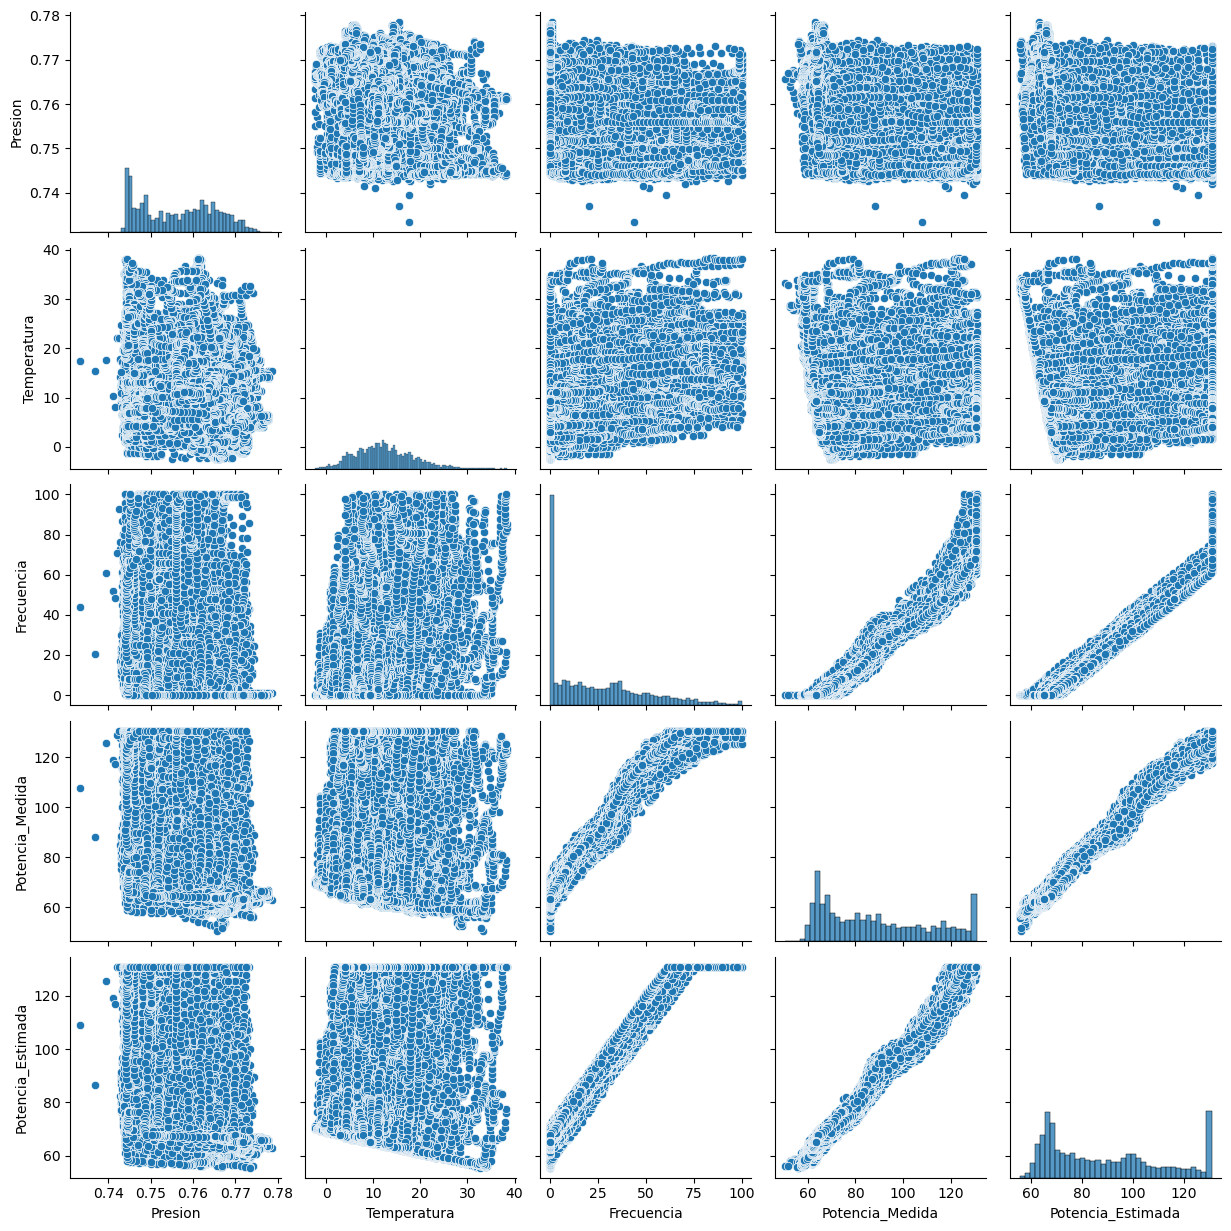

In [3]:
sns.pairplot(b)

<Axes: >

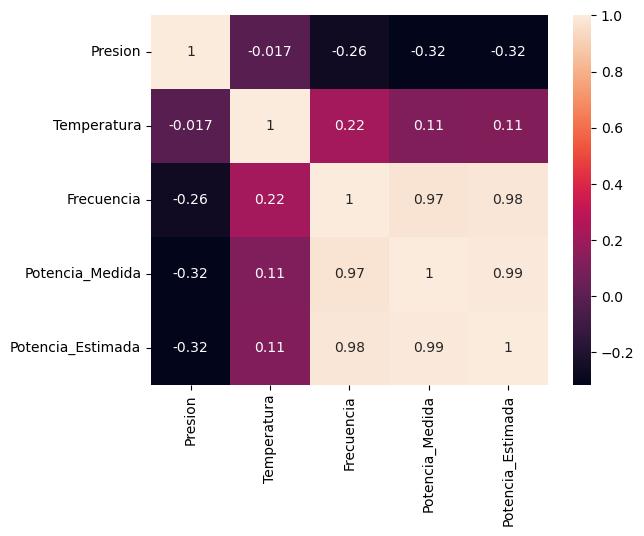

In [4]:
import seaborn as sns
sns.heatmap(b.corr(), annot=True)

In [5]:
b.shape

(45966, 5)

In [6]:
from sklearn.model_selection import train_test_split

Xb = b.drop(['Potencia_Medida', 'Potencia_Estimada'], axis=1)
yb = b['Potencia_Medida']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, train_size=0.65, random_state=42)

print(Xb_train.shape, Xb_test.shape)
print(yb_train.shape,  yb_test.shape)

(29877, 3) (16089, 3)
(29877,) (16089,)


In [7]:
from sklearn.metrics import mean_squared_error, r2_score, root_mean_squared_error
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import TweedieRegressor
from sklearn.model_selection import cross_val_score,cross_validate, GridSearchCV

In [8]:
models=[LinearRegression(),Lasso(max_iter=1000),Ridge(max_iter=1000),ElasticNet(max_iter=1000),TweedieRegressor(max_iter=10000)]

for model in models:
    cv_score=cross_validate(model,Xb,yb,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model LinearRegression() = -3.0872209387848524
R2 for model LinearRegression() = 0.9612181683531726
MAE for model Lasso() = -3.2462542557785605
R2 for model Lasso() = 0.957472867201214
MAE for model Ridge(max_iter=1000) = -3.0798343051290784
R2 for model Ridge(max_iter=1000) = 0.961039558832131
MAE for model ElasticNet() = -3.2405677264803807
R2 for model ElasticNet() = 0.9575304880131194
MAE for model TweedieRegressor(max_iter=10000) = -3.235727379786744
R2 for model TweedieRegressor(max_iter=10000) = 0.9575731561808531


In [9]:
model_hyperparameters = {
    'lin_reg':{
      
    },
    'lasso_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'ridge_reg':{
        'alpha':[0.5,1,5,10,20]        
    },
    'elastic_reg':{
        'alpha':[0.5,1,5,10,20],
        'l1_ratio':[0.1,0.3,0.5,0.7,0.9]        
    },
    'tweedie_reg':{
        'power':[0,1,2,3],
        'alpha':[0, 0.5, 1, 5, 10, 20],    
        'link':['log','identity']    
    }
}

In [10]:
model_keys=list(model_hyperparameters.keys())

In [11]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xb,yb)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,LinearRegression(),0.961218,{}
1,Lasso(),0.957560,{'alpha': 0.5}
2,Ridge(max_iter=1000),0.961188,{'alpha': 0.5}
3,ElasticNet(),0.957590,"{'alpha': 0.5, 'l1_ratio': 0.1}"
4,TweedieRegressor(max_iter=10000),0.961218,"{'alpha': 0, 'link': 'identity', 'power': 0}"


LINEAL

In [12]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, lr.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, lr.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, lr.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, lr.predict(Xb_test)))

n_scores = cross_val_score(lr, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.243833792977323
Train R2:  0.963164773411432
Test RMSE:  4.247926852411338
Test R2:  0.9630299846101853
R2: 0.961 (0.006)


In [13]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.5, max_iter=1000)
ridge.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, ridge.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, ridge.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, ridge.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, ridge.predict(Xb_test)))

n_scores = cross_val_score(ridge, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.2508163611453105
Train R2:  0.9630434604250282
Test RMSE:  4.255335563837239
Test R2:  0.9629009150492187
R2: 0.961 (0.006)


In [14]:
from sklearn.linear_model import TweedieRegressor

tweedie = TweedieRegressor(alpha= 0, link= 'identity', power= 0)
tweedie.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, tweedie.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, tweedie.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, tweedie.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, tweedie.predict(Xb_test)))

n_scores = cross_val_score(tweedie, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  4.243833792993198
Train R2:  0.9631647734111565
Test RMSE:  4.247926965250801
Test R2:  0.9630299826460852
R2: 0.961 (0.006)


KERNEL

In [15]:
from sklearn.svm import SVR

svr = SVR(kernel= 'rbf')
svr.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, svr.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, svr.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, svr.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, svr.predict(Xb_test)))

n_scores = cross_val_score(svr, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  2.066524673063738
Train R2:  0.9912657060867135
Test RMSE:  2.056844192593323
Test R2:  0.9913324099673589
R2: 0.989 (0.003)


ARBOLES

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [17]:
models=[DecisionTreeRegressor(), RandomForestRegressor()]

for model in models:
    cv_score=cross_validate(model,Xb,yb,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model DecisionTreeRegressor() = -2.170025857336128
R2 for model DecisionTreeRegressor() = 0.9827959305825834
MAE for model RandomForestRegressor() = -1.8167536951958965
R2 for model RandomForestRegressor() = 0.9880808768654388


In [18]:
model_hyperparameters = {
    'decision_tree': {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'random_forest': {
        'n_estimators': [50, 100],
        'max_depth': [None, 5, 10],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }
}

In [19]:
model_keys=list(model_hyperparameters.keys())

In [20]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xb,yb)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,DecisionTreeRegressor(),0.987326,"{'max_depth': 10, 'min_samples_leaf': 4, 'min_..."
1,RandomForestRegressor(),0.989031,"{'max_depth': 10, 'min_samples_leaf': 2, 'min_..."


In [21]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth= 3)
dt.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, dt.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, dt.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, dt.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, dt.predict(Xb_test)))

n_scores = cross_val_score(dt, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.875798811290059
Train R2:  0.969276615029244
Test RMSE:  3.887601604151854
Test R2:  0.9690358560956265
R2: 0.964 (0.005)


In [22]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(max_depth= 3)
rf.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, rf.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, rf.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, rf.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, rf.predict(Xb_test)))

n_scores = cross_val_score(rf, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  3.733988570403235
Train R2:  0.9714837390115408
Test RMSE:  3.7392573583847515
Test R2:  0.9713538484120532
R2: 0.966 (0.005)


BOOSTING

In [23]:
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [24]:
models=[GradientBoostingRegressor(), XGBRegressor()]

for model in models:
    cv_score=cross_validate(model,Xb,yb,scoring=['neg_mean_absolute_error','r2'],cv=5)
    
    mean_mae = sum(cv_score['test_neg_mean_absolute_error'])/len(cv_score['test_neg_mean_absolute_error'])
    mean_r2 = sum(cv_score['test_r2'])/len(cv_score['test_r2'])
    print("MAE for model",model,'=',mean_mae)
    print("R2 for model",model,'=',mean_r2)

MAE for model GradientBoostingRegressor() = -1.718261995791887
R2 for model GradientBoostingRegressor() = 0.989560521171802
MAE for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) = -1.822570748697205
R2 for model XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsampl

In [25]:
model_hyperparameters = {
    'gradient_boosting': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7]
    },
    'xgboost': {
        'n_estimators': [50, 100],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'subsample': [0.7, 1.0]
    }
}

In [26]:
model_keys=list(model_hyperparameters.keys())

In [27]:
result = []
i=0

for model in models:
    key=model_keys[i]
    i+=1
    params = model_hyperparameters[key]

    regressor=GridSearchCV(model,params,cv=5,scoring=['r2'],refit='r2')

    regressor.fit(Xb,yb)
    result.append({
        'model_used':model,
        'highest_score':regressor.best_score_,
        'best hyperparameters':regressor.best_params_
    })

pd.DataFrame(result)

,model_used,highest_score,best hyperparameters
0,GradientBoostingRegressor(),0.989634,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."
1,"XGBRegressor(base_score=None, booster=None, ca...",0.989639,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti..."


In [28]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 50)
gb.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, gb.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, gb.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, gb.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, gb.predict(Xb_test)))

n_scores = cross_val_score(gb, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.6882498247126867
Train R2:  0.9941706512436036
Test RMSE:  1.745255760395159
Test R2:  0.9937595812643786
R2: 0.990 (0.003)


In [29]:
from xgboost import XGBRegressor

xgb = XGBRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 50, subsample= 1.0)
xgb.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, xgb.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, xgb.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, xgb.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, xgb.predict(Xb_test)))

n_scores = cross_val_score(xgb, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.7112440837502418
Train R2:  0.9940107763387065
Test RMSE:  1.755798224370273
Test R2:  0.9936839612936457
R2: 0.990 (0.003)


STACKING

In [30]:
from sklearn.ensemble import StackingRegressor
estimators = [
    ('rf', RandomForestRegressor(max_depth= 12, min_samples_leaf= 2, min_samples_split= 5, n_estimators= 50)),
    ('svr', SVR(kernel='rbf')),
    ('XGBoost', XGBRegressor(learning_rate= 0.1, max_depth= 5, n_estimators= 50, subsample= 1.0)),
    ('ridge', Ridge(alpha=1, max_iter=1000))
]

stacking_model_b = StackingRegressor(
    estimators=estimators,
    final_estimator= LinearRegression(),
    cv=5
)

stacking_model_b.fit(Xb_train, yb_train)

print("Train RMSE: ", root_mean_squared_error(yb_train, stacking_model_b.predict(Xb_train)))
print("Train R2: ", r2_score(yb_train, stacking_model_b.predict(Xb_train)))

print("Test RMSE: ", root_mean_squared_error(yb_test, stacking_model_b.predict(Xb_test)))
print("Test R2: ", r2_score(yb_test, stacking_model_b.predict(Xb_test)))

n_scores = cross_val_score(stacking_model_b, Xb, yb, scoring='r2', cv= 5, error_score='raise')
print('R2: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Train RMSE:  1.1872082019122119
Train R2:  0.9971172937551337
Test RMSE:  1.5501494746453928
Test R2:  0.9950768538706746
R2: 0.990 (0.003)


In [ ]:
import joblib
joblib.dump(stacking_model_b, 'modelo_b.pkl')

['modelo_b.pkl']